### Import libraries

In [122]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence, permutation_importance
import autosklearn.regression
import matplotlib.pyplot as plt
import sys
import datetime
from datetime import date, timedelta
from tqdm.notebook import tqdm
import pickle

### Read Datasets

In [123]:
inflow_df = pd.read_csv('../../dataset/reservoir_dataset_engg.csv')
inflow_df = inflow_df[inflow_df['RESERVOIR'] == 'K.R.S']
print(inflow_df.shape)
inflow_df.head()

(3274, 10)


,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,WINTER
1,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1,WINTER
2,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2,WINTER
3,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3,WINTER
4,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4,WINTER


In [124]:
weather_df = pd.read_csv('../../dataset/Weather/mysuru_kodagu_hassan_weather.csv')
print(weather_df.shape)
weather_df.head()

(12783, 35)


,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,heavy intensity drizzle,very heavy rain,thunderstorm with heavy rain,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,0,0,0


In [125]:
weather_df['YYYY'] = weather_df['date'].str[:4].astype(int)
weather_df['MM'] = weather_df['date'].str[5:7].astype(int)
weather_df['DD'] = weather_df['date'].str[8:].astype(int)
weather_df

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,2010,1,1
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,2010,1,1
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,2010,1,1
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,2010,1,2
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12778,2021-08-30,Kodagu,20.07,20.57,19.03,23.77,1009.00,93.50,1.71,241.83,...,0,0,0,0,0,0,0,2021,8,30
12779,2021-08-30,Mysuru,22.36,22.90,19.59,28.21,1009.33,82.33,5.38,253.62,...,0,0,0,0,0,0,0,2021,8,30
12780,2021-08-31,Hassan,21.86,22.21,18.87,26.31,1009.29,82.17,3.39,249.33,...,0,0,0,0,0,0,0,2021,8,31
12781,2021-08-31,Kodagu,21.29,21.81,19.03,26.23,1009.79,89.21,1.78,245.88,...,0,0,0,0,0,0,0,2021,8,31


In [126]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

print(kodagu_df.shape, hassan_df.shape, mysuru_df.shape)

(4261, 38) (4261, 38) (4261, 38)


### Check Coorelation

In [127]:
m = mysuru_df.copy()
m = m.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert m.shape[0] == 4261
m.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Mysuru,23.21,23.24,16.74,29.32,1014.58,64.33,2.19,71.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
h = hassan_df.copy()
h = h.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert h.shape[0] == 4261
h.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
k = kodagu_df.copy()
k = k.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert k.shape[0] == 4261
k.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


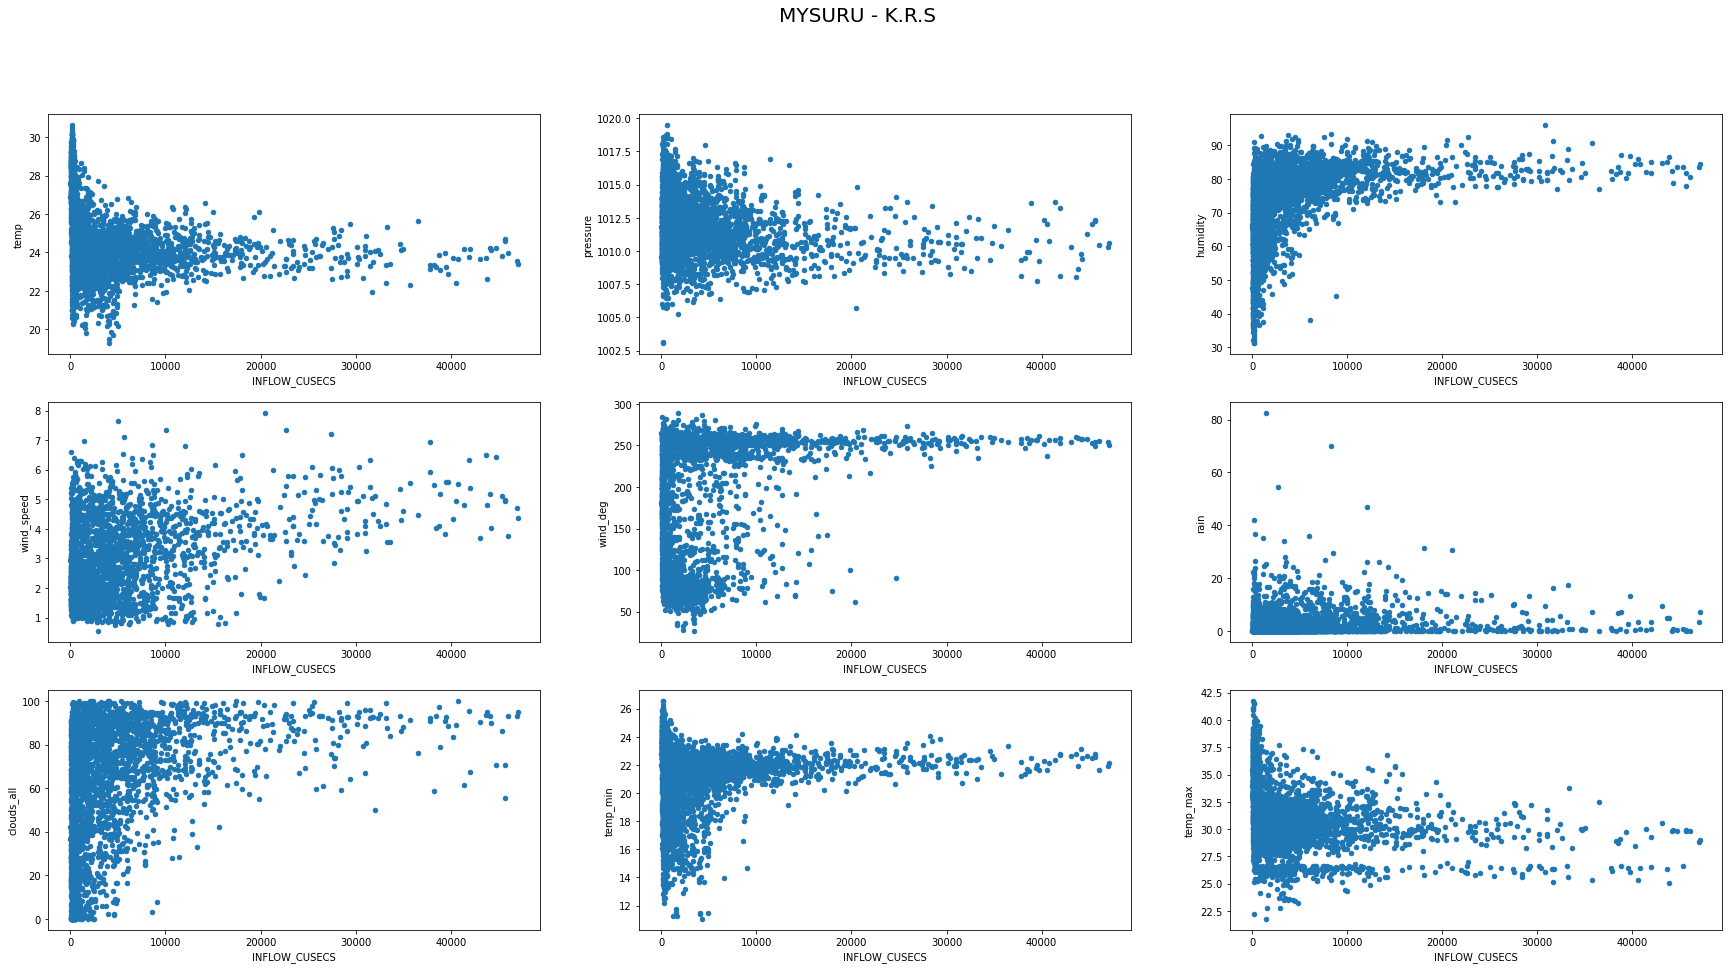

In [130]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
m.plot(x='INFLOW_CUSECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
m.plot(x='INFLOW_CUSECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
m.plot(x='INFLOW_CUSECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
m.plot(x='INFLOW_CUSECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
m.plot(x='INFLOW_CUSECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
m.plot(x='INFLOW_CUSECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
m.plot(x='INFLOW_CUSECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
m.plot(x='INFLOW_CUSECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
m.plot(x='INFLOW_CUSECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('MYSURU - K.R.S', fontsize=20)
plt.show()

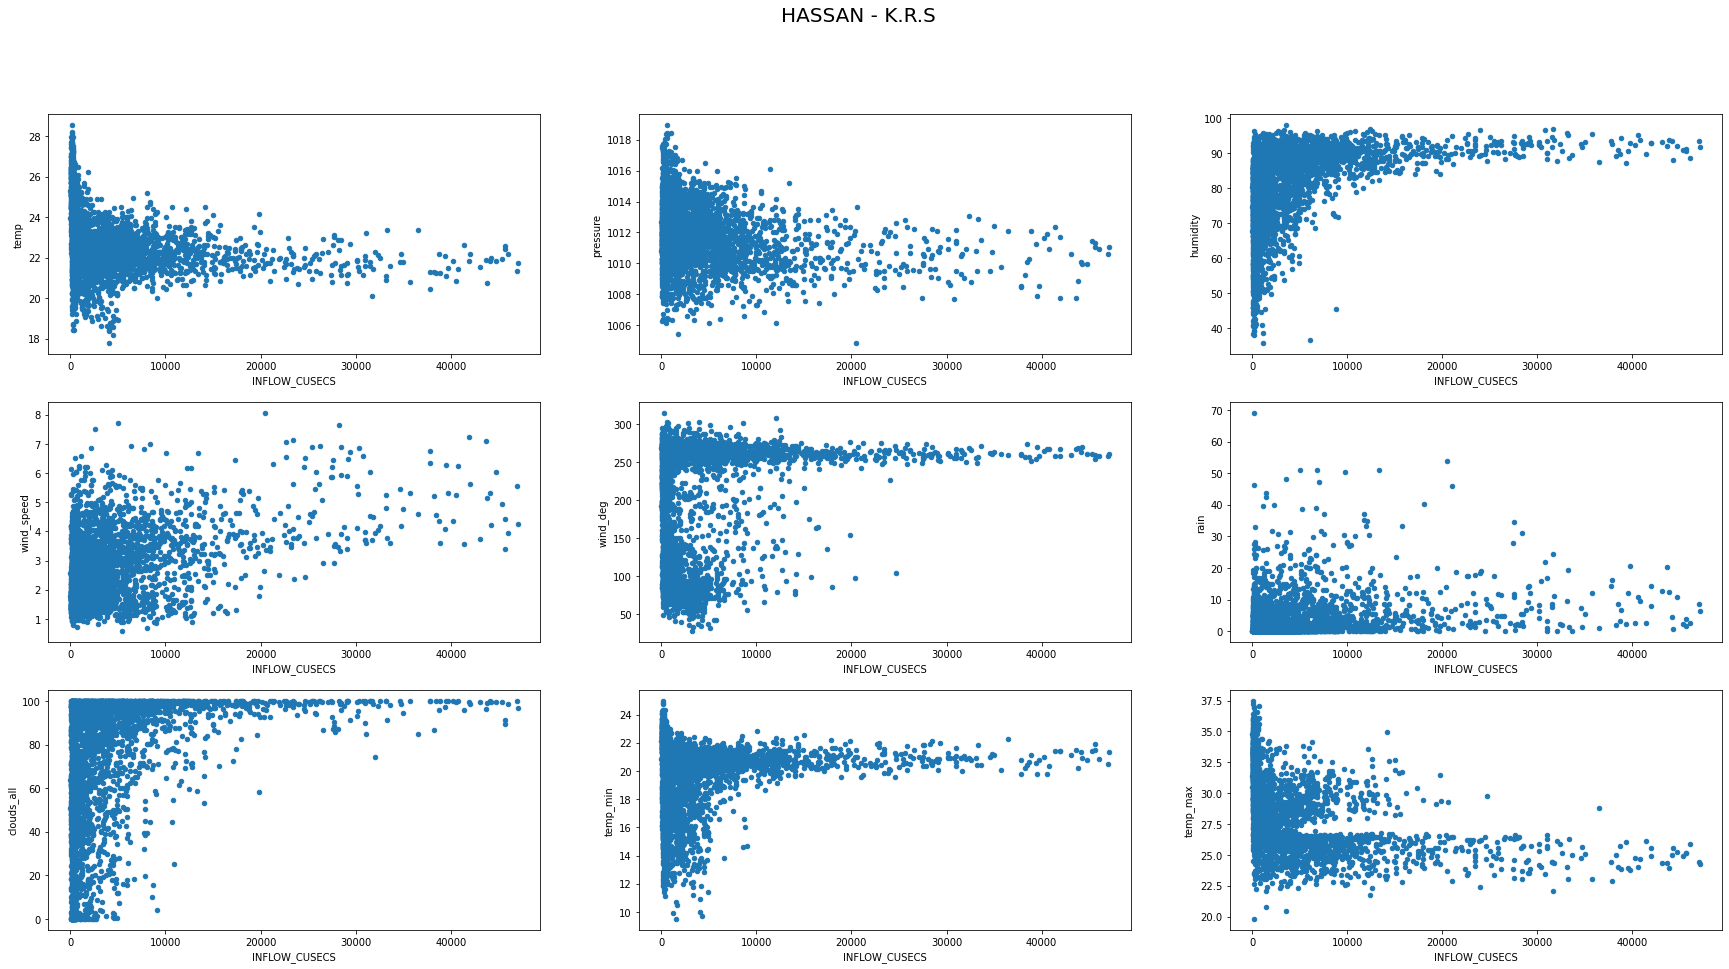

In [131]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
h.plot(x='INFLOW_CUSECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
h.plot(x='INFLOW_CUSECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
h.plot(x='INFLOW_CUSECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
h.plot(x='INFLOW_CUSECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
h.plot(x='INFLOW_CUSECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
h.plot(x='INFLOW_CUSECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
h.plot(x='INFLOW_CUSECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
h.plot(x='INFLOW_CUSECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
h.plot(x='INFLOW_CUSECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('HASSAN - K.R.S', fontsize=20)
plt.show()

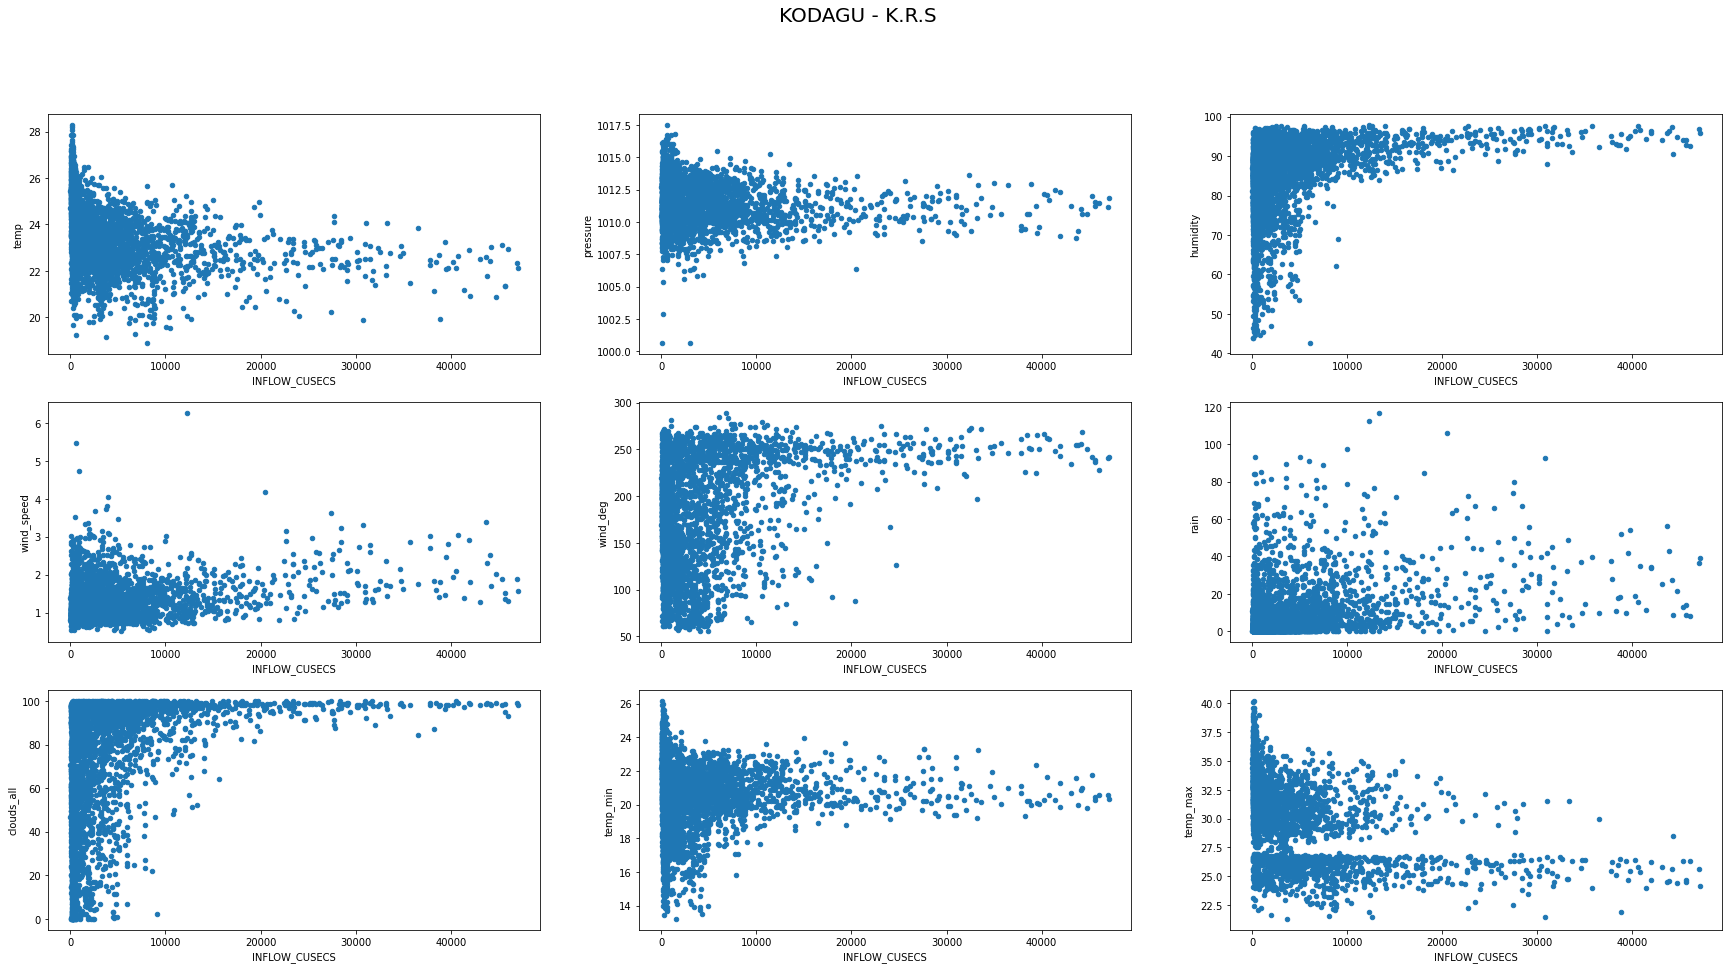

In [132]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
k.plot(x='INFLOW_CUSECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
k.plot(x='INFLOW_CUSECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
k.plot(x='INFLOW_CUSECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
k.plot(x='INFLOW_CUSECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
k.plot(x='INFLOW_CUSECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
k.plot(x='INFLOW_CUSECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
k.plot(x='INFLOW_CUSECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
k.plot(x='INFLOW_CUSECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
k.plot(x='INFLOW_CUSECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('KODAGU - K.R.S', fontsize=20)
plt.show()

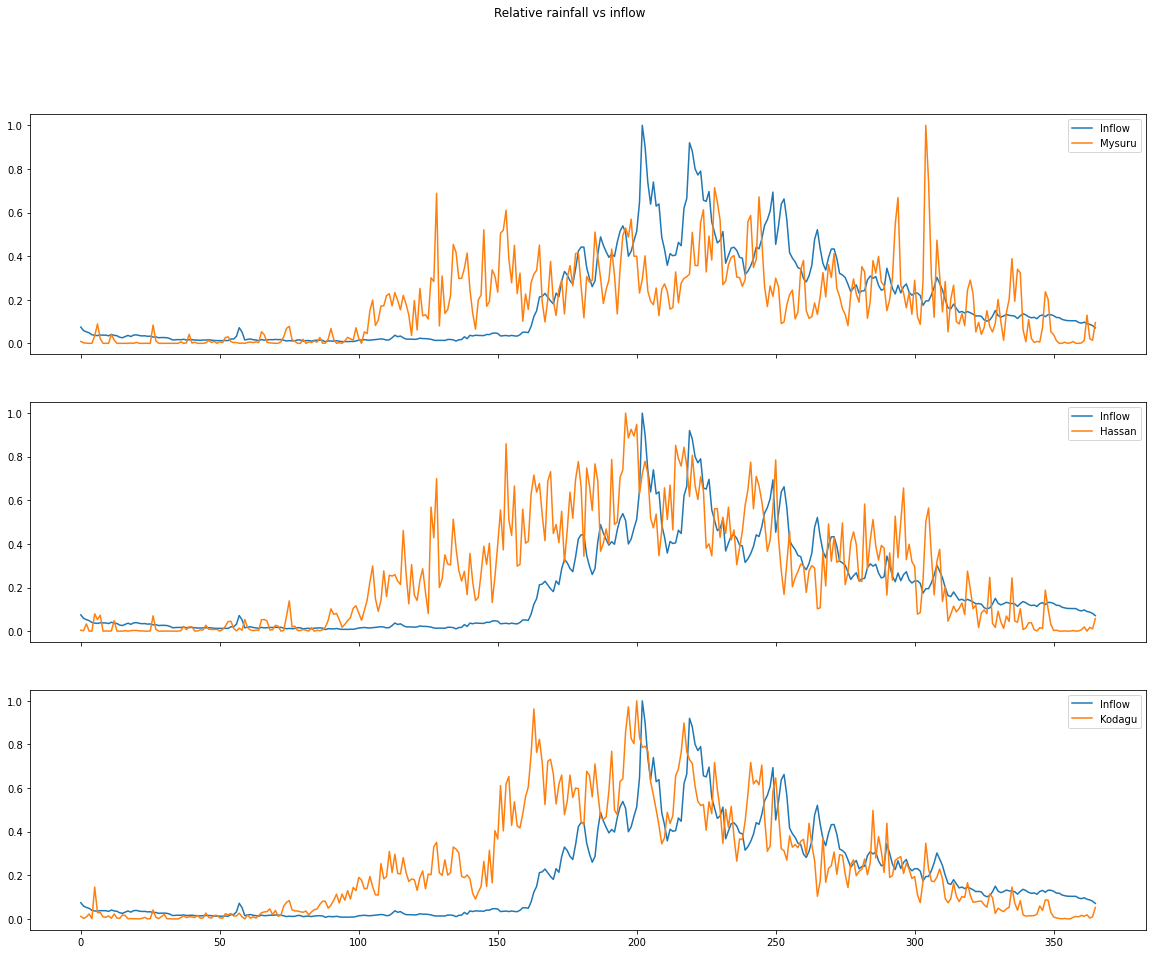

In [133]:
m.rename(columns={'rain': 'mysuru_rain'}, inplace=True)
h.rename(columns={'rain': 'hassan_rain'}, inplace=True)
k.rename(columns={'rain': 'kodagu_rain'}, inplace=True)
t = m[['YYYY', 'DD', 'MM', 'INFLOW_CUSECS', 'mysuru_rain']].merge(h[['YYYY', 'DD', 'MM', 'INFLOW_CUSECS', 'hassan_rain']], on=['YYYY', 'DD', 'MM', 'INFLOW_CUSECS'], how='inner').merge(k[['YYYY', 'DD', 'MM', 'INFLOW_CUSECS', 'kodagu_rain']], on=['YYYY', 'DD', 'MM', 'INFLOW_CUSECS'], how='inner')
g = t.groupby(['MM', 'DD'])[['INFLOW_CUSECS', 'mysuru_rain', 'hassan_rain', 'kodagu_rain']].mean()

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(20, 15))
ax[0].plot(range(g.shape[0]), g['INFLOW_CUSECS'].values / g['INFLOW_CUSECS'].max(), label='Inflow')
ax[0].plot(range(g.shape[0]), g['mysuru_rain'].values / g['mysuru_rain'].max(), label='Mysuru')
ax[1].plot(range(g.shape[0]), g['INFLOW_CUSECS'].values / g['INFLOW_CUSECS'].max(), label='Inflow')
ax[1].plot(range(g.shape[0]), g['hassan_rain'].values / g['hassan_rain'].max(), label='Hassan')
ax[2].plot(range(g.shape[0]), g['INFLOW_CUSECS'].values / g['INFLOW_CUSECS'].max(), label='Inflow')
ax[2].plot(range(g.shape[0]), g['kodagu_rain'].values / g['kodagu_rain'].max(), label='Kodagu')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('Relative rainfall vs inflow')
plt.show()

### Dataset Transformation

In [134]:
inflow_df = inflow_df[['INFLOW_CUSECS', 'YEAR', 'MONTH', 'DATE', 'SEASON']]
inflow_df.head()

,INFLOW_CUSECS,YEAR,MONTH,DATE,SEASON
0,2029.0,2011,1,1,WINTER
1,3084.0,2011,1,2,WINTER
2,2776.0,2011,1,3,WINTER
3,2311.0,2011,1,4,WINTER
4,1847.0,2011,1,5,WINTER


In [135]:
month_le = LabelEncoder().fit(inflow_df['MONTH'].unique())
date_le = LabelEncoder().fit(inflow_df['DATE'].unique())
season_le = LabelEncoder().fit(inflow_df['SEASON'].unique())

In [136]:
# month_oe = OneHotEncoder().fit(inflow_df[['MONTH']])
# date_oe = OneHotEncoder().fit(inflow_df[['DATE']])
# season_oe = OneHotEncoder().fit(inflow_df[['SEASON']])

In [137]:
rs_inflow = RobustScaler().fit(inflow_df[['INFLOW_CUSECS']])
rs_temp = RobustScaler().fit(weather_df[['temp']])
rs_feels_like = RobustScaler().fit(weather_df[['feels_like']])
rs_temp_min = RobustScaler().fit(weather_df[['temp_min']])
rs_temp_max = RobustScaler().fit(weather_df[['temp_max']])
rs_pressure = RobustScaler().fit(weather_df[['pressure']])
rs_humidity = RobustScaler().fit(weather_df[['humidity']])
rs_wind_speed = RobustScaler().fit(weather_df[['wind_speed']])
rs_wind_deg = RobustScaler().fit(weather_df[['wind_deg']])
rs_rain = RobustScaler().fit(weather_df[['rain']])
rs_clouds_all = RobustScaler().fit(weather_df[['clouds_all']])
# remaining columns will be divided by 24 for scaling purpose.

In [138]:
inflow_df['INFLOW_CUSECS'] = rs_inflow.transform(inflow_df[['INFLOW_CUSECS']]).flatten()
inflow_df.head()

,INFLOW_CUSECS,YEAR,MONTH,DATE,SEASON
0,0.073551,2011,1,1,WINTER
1,0.289397,2011,1,2,WINTER
2,0.226382,2011,1,3,WINTER
3,0.131246,2011,1,4,WINTER
4,0.036315,2011,1,5,WINTER


In [139]:
weather_df.columns

Index(['date', 'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm',
       'YYYY', 'MM', 'DD'],
      dtype='object')

In [140]:
weather_df['temp'] = rs_temp.transform(weather_df[['temp']]).flatten()
weather_df['feels_like'] = rs_feels_like.transform(weather_df[['feels_like']]).flatten()
weather_df['temp_min'] = rs_temp_min.transform(weather_df[['temp_min']]).flatten()
weather_df['temp_max'] = rs_temp_max.transform(weather_df[['temp_max']]).flatten()
weather_df['pressure'] = rs_pressure.transform(weather_df[['pressure']]).flatten()
weather_df['humidity'] = rs_humidity.transform(weather_df[['humidity']]).flatten()
weather_df['wind_speed'] = rs_wind_speed.transform(weather_df[['wind_speed']]).flatten()
weather_df['wind_deg'] = rs_wind_deg.transform(weather_df[['wind_deg']]).flatten()
weather_df['rain'] = rs_rain.transform(weather_df[['rain']]).flatten()
weather_df['clouds_all'] = rs_clouds_all.transform(weather_df[['clouds_all']]).flatten()
weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] = weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] / 24

In [141]:
weather_df.head()

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,-0.736,-0.737201,-1.281690,-0.657143,0.683274,-0.156784,0.559748,-0.826564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
1,2010-01-01,Kodagu,0.116,0.180887,-0.281690,0.242857,0.209964,0.161345,-0.232704,-0.714651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
2,2010-01-01,Mysuru,0.228,0.112628,-0.718310,0.048214,0.476868,-0.698404,0.440252,-0.818667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
3,2010-01-02,Hassan,-1.152,-1.153584,-2.250000,-0.478571,1.306050,-0.394527,0.314465,-0.969765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2
4,2010-01-02,Kodagu,-0.020,0.078498,-0.591549,0.330357,0.889680,-0.130559,-0.320755,-0.652602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2


In [142]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

In [143]:
train_inflow_df = inflow_df[inflow_df['YEAR'] < 2020].reset_index(drop=True)
val_inflow_df = inflow_df[inflow_df['YEAR'] == 2020].reset_index(drop=True)

train_inflow_df.shape, val_inflow_df.shape

((2944, 5), (330, 5))

In [144]:
def embed_day(df):
    data = {}
    for index in tqdm(df.index):
        row = df.iloc[index]
        inflow = row['INFLOW_CUSECS']
        year = row['YEAR']
        month = row['MONTH']
        date = row['DATE']
        season = row['SEASON']

        ddmmyyyy = datetime.date(year, month, date)
        ddmmyyyy_list = [str(ddmmyyyy + timedelta(days=day)) for day in range(-14, 2)]

        sel_kodagu = kodagu_df[kodagu_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_hassan = hassan_df[hassan_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_mysuru = mysuru_df[mysuru_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        
        month_transformed = month_le.transform([month])
        date_transformed = date_le.transform([date])
        season_transformed = season_le.transform([season])
        # month_transformed = month_oe.transform([[month]]).toarray().flatten()
        # date_transformed = date_oe.transform([[date]]).toarray().flatten()
        # season_transformed = season_oe.transform([[season]]).toarray().flatten()
        
#         data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_kodagu, sel_hassan, [inflow]])
        data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_mysuru, sel_kodagu, sel_hassan, [inflow]])
    return pd.DataFrame(data).T

In [145]:
train_emb_df = embed_day(train_inflow_df)
val_emb_df = embed_day(val_inflow_df)

  0%|          | 0/2944 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

In [146]:
train_emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
2011-01-01,0.0,0.0,2.0,-0.700,-0.686007,-0.961268,-0.642857,0.224199,-0.033637,0.088050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073551
2011-01-02,0.0,1.0,2.0,-0.624,-0.682594,-0.823944,-0.857143,0.669039,-0.529647,0.622642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289397
2011-01-03,0.0,2.0,2.0,-0.580,-0.535836,-0.095070,-0.730357,0.921708,0.142531,0.798742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226382
2011-01-04,0.0,3.0,2.0,-1.044,-1.064846,-2.038732,-0.475000,0.416370,-0.458951,0.245283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131246
2011-01-05,0.0,4.0,2.0,-1.196,-1.273038,-2.739437,-0.453571,-0.163701,-0.819840,-0.358491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036315


In [147]:
X_train, y_train = train_emb_df.values[:, :-1], train_emb_df.values[:, -1]
X_val, y_val = val_emb_df.values[:, :-1], val_emb_df.values[:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2944, 1587), (2944,), (330, 1587), (330,))

### Model Training

In [150]:
%%time
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=20*60,
    per_run_time_limit=120,
    ensemble_size=1,
    initial_configurations_via_metalearning=0,
    tmp_folder='inflow_weather_model_autosklearn_regression_tmp',
)
automl.fit(X_train, y_train, dataset_name='krs_inflow')

[WARNING] [2021-09-12 09:43:21,584:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-09-12 09:45:25,765:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-09-12 09:45:41,303:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
CPU times: user 1min 30s, sys: 5.13 s, total: 1min 35s
Wall time: 20min 1s


AutoSklearnRegressor(ensemble_size=1, initial_configurations_via_metalearning=0,
                     per_run_time_limit=120, time_left_for_this_task=1200,
                     tmp_folder='inflow_weather_model_autosklearn_regression_tmp')

In [151]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: krs_inflow
  Metric: r2
  Best validation score: 0.795510
  Number of target algorithm runs: 34
  Number of successful target algorithm runs: 23
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 5



In [152]:
print(automl.show_models())

[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'random_forest', 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'complete', 'feature_preprocessor:feature_agglomeration:n_clusters': 131, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'friedman_mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 0.8666341115474196, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor

In [153]:
print(automl.leaderboard())

          rank  ensemble_weight           type     cost   duration
model_id                                                          
30           1              1.0  random_forest  0.20449  77.787517


In [154]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_val)
print("Test R2 score:", r2_score(y_val, test_predictions))

Train R2 score: 0.8770894825591752
Test R2 score: 0.6178129078731804


### Predict and check Loss

In [155]:
y_pred_train = automl.predict(X_train)
y_pred_train = rs_inflow.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_train_inv_trf = rs_inflow.inverse_transform(y_train.reshape(-1, 1)).flatten()
loss = mean_squared_error(y_train_inv_trf, y_pred_train)
loss

5477753.5103952885

In [156]:
y_pred_test = automl.predict(X_val)
y_pred_test = rs_inflow.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_val_inv_trf = rs_inflow.inverse_transform(y_val.reshape(-1, 1)).flatten()
loss = mean_squared_error(y_val_inv_trf, y_pred_test)
loss

9390760.40558882

### Compare Prediction on Test data

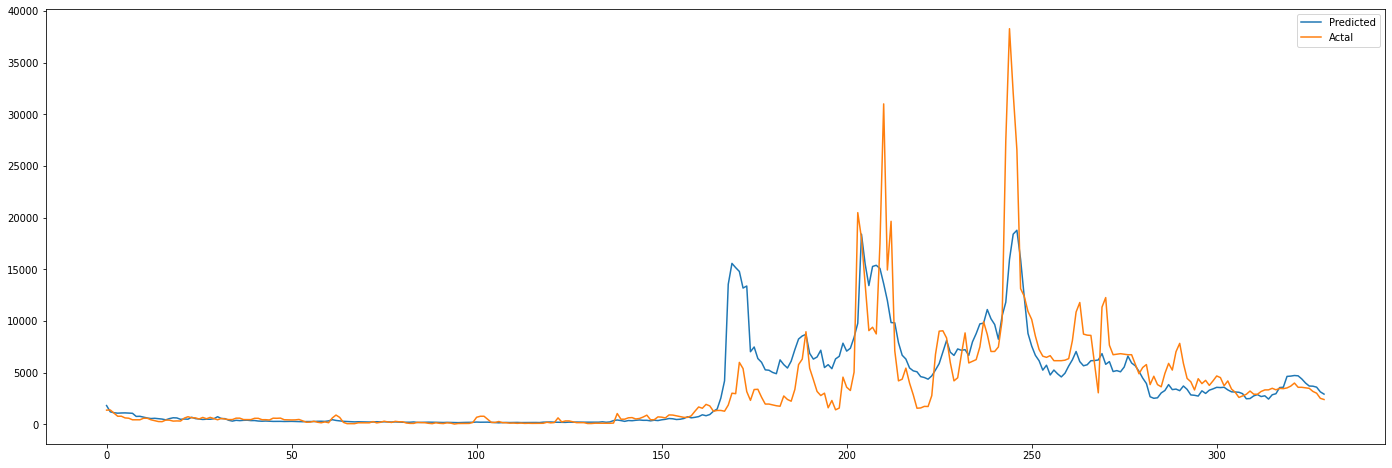

In [157]:
plt.figure(figsize=(24,8))
plt.plot(y_pred_test, label='Predicted')
plt.plot(y_val_inv_trf, label='Actal')
plt.legend()
plt.show()

### Compare Prediction on Entire data

In [113]:
y_pred = np.concatenate([y_pred_train, y_pred_test])
y_true = np.concatenate([y_train, y_val])
model_pred_df = pd.DataFrame({'y_pred': y_pred, 'y_true': y_true})
model_pred_df

,y_pred,y_true
0,2098.705866,0.073551
1,2784.095857,0.289397
2,2749.872870,0.226382
3,2239.081385,0.131246
4,1704.032684,0.036315
...,...,...
3269,3255.566108,0.373689
3270,3150.254762,0.312516
3271,3159.201732,0.277531
3272,3145.475742,0.176052


In [114]:
inflow_df['Predicted_Inflow'] = y_pred
inflow_df

,INFLOW_CUSECS,YEAR,MONTH,DATE,SEASON,Predicted_Inflow
0,0.073551,2011,1,1,WINTER,2098.705866
1,0.289397,2011,1,2,WINTER,2784.095857
2,0.226382,2011,1,3,WINTER,2749.872870
3,0.131246,2011,1,4,WINTER,2239.081385
4,0.036315,2011,1,5,WINTER,1704.032684
...,...,...,...,...,...,...
3269,0.373689,2020,12,12,WINTER,3255.566108
3270,0.312516,2020,12,13,WINTER,3150.254762
3271,0.277531,2020,12,14,WINTER,3159.201732
3272,0.176052,2020,12,15,WINTER,3145.475742


In [115]:
inflow_df['INFLOW_CUSECS'] = rs_inflow.inverse_transform(inflow_df[['INFLOW_CUSECS']])
inflow_df.head()

,INFLOW_CUSECS,YEAR,MONTH,DATE,SEASON,Predicted_Inflow
0,2029.0,2011,1,1,WINTER,2098.705866
1,3084.0,2011,1,2,WINTER,2784.095857
2,2776.0,2011,1,3,WINTER,2749.872870
3,2311.0,2011,1,4,WINTER,2239.081385
4,1847.0,2011,1,5,WINTER,1704.032684


In [116]:
avg_daily_pred_inflow = inflow_df.groupby(['MONTH', 'DATE'])['Predicted_Inflow'].mean().values
avg_daily_actual_inflow = inflow_df.groupby(['MONTH', 'DATE'])['INFLOW_CUSECS'].mean().values

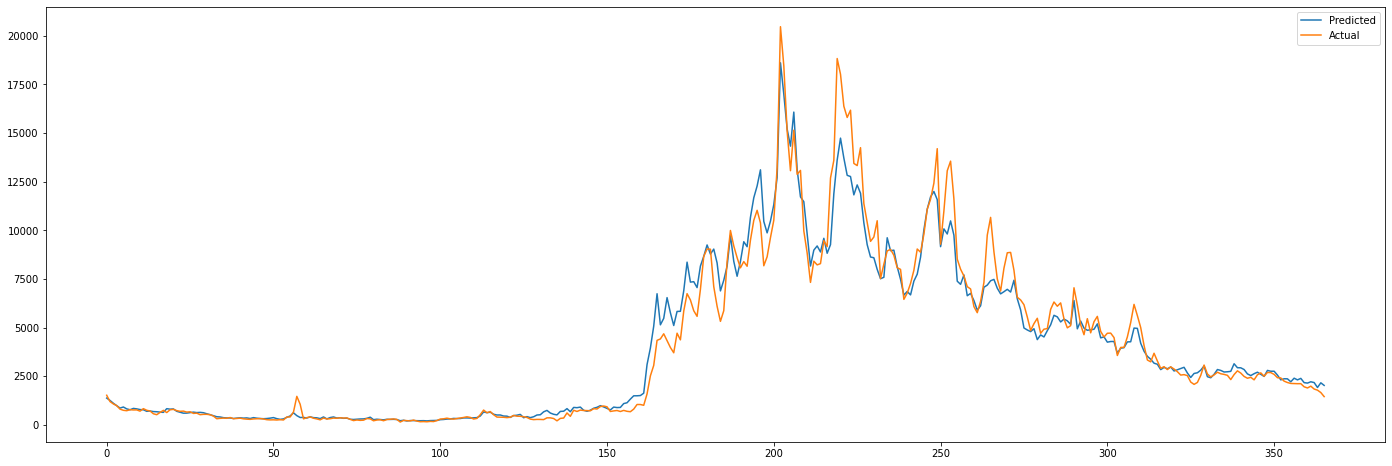

In [117]:
plt.figure(figsize=(24, 8))
plt.plot(avg_daily_pred_inflow, label='Predicted')
plt.plot(avg_daily_actual_inflow, label='Actual')
plt.legend()
# ax2.plot(avg_daily_actual_rainfall, label='Actual')
plt.show()

In [118]:
inflow_df.sort_values(by=['YEAR', 'MONTH', 'DATE'], inplace=True)

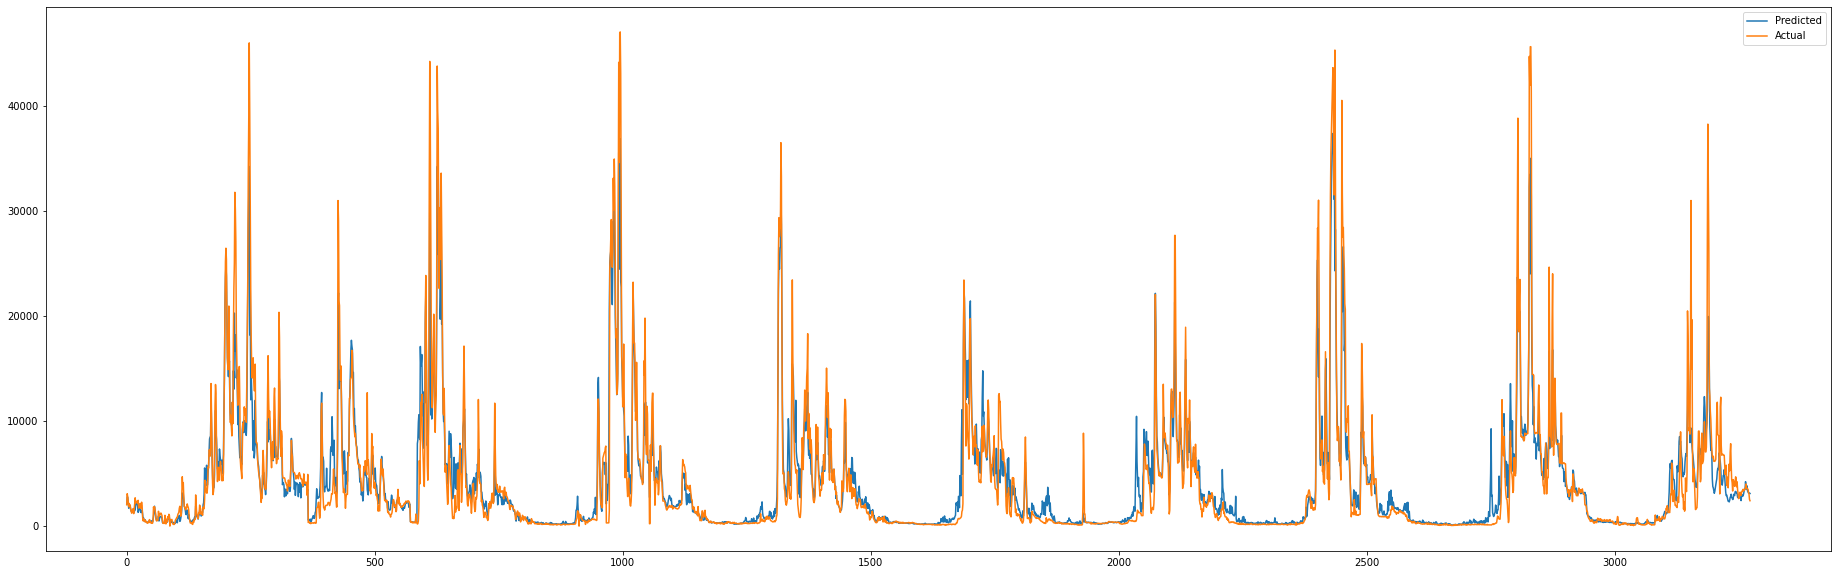

In [119]:
plt.figure(figsize=(32, 10))
plt.plot(inflow_df['Predicted_Inflow'], label='Predicted')
plt.plot(inflow_df['INFLOW_CUSECS'], label='Actual')
plt.legend()
plt.show()

In [120]:
((y_train_inv_trf - y_pred_train) ** 2).mean() ** .5

2323.201378436595

In [121]:
((y_val_inv_trf - y_pred_test) ** 2).mean() ** .5

2808.133137603887

In [44]:
feature_list = [['Month', 'Date', 'Season']] + [[f'{day_region}_temp', f'{day_region}_feels_like', f'{day_region}_temp_min', f'{day_region}_temp_max', f'{day_region}_pressure', f'{day_region}_humidity',
                                                 f'{day_region}_wind_speed', f'{day_region}_wind_deg', f'{day_region}_rain', f'{day_region}_clouds_all', f'{day_region}_broken clouds', f'{day_region}_overcast clouds',
                                                 f'{day_region}_scattered clouds', f'{day_region}_sky is clear', f'{day_region}_few clouds', f'{day_region}_fog', f'{day_region}_light rain', f'{day_region}_mist',
                                                 f'{day_region}_haze', f'{day_region}_moderate rain', f'{day_region}_heavy intensity rain', f'{day_region}_light intensity drizzle', f'{day_region}_drizzle',
                                                 f'{day_region}_heavy intensity drizzle', f'{day_region}_very heavy rain', f'{day_region}_thunderstorm with heavy rain', f'{day_region}_thunderstorm with rain',
                                                 f'{day_region}_thunderstorm', f'{day_region}_proximity shower rain', f'{day_region}_thunderstorm with light rain', f'{day_region}_shower rain',
                                                 f'{day_region}_light intensity shower rain', f'{day_region}_light thunderstorm'] for day_region in ['1_mysuru', '2_mysuru', '1_kodagu', '2_kodagu', '1_hassan', '2_hassan']]
feature_list = feature_list[0] + feature_list[1] + feature_list[2] + feature_list[3] + feature_list[4] + feature_list[5] + feature_list[6]
len(feature_list)

201

In [45]:
feature_list

['Month',
 'Date',
 'Season',
 '1_mysuru_temp',
 '1_mysuru_feels_like',
 '1_mysuru_temp_min',
 '1_mysuru_temp_max',
 '1_mysuru_pressure',
 '1_mysuru_humidity',
 '1_mysuru_wind_speed',
 '1_mysuru_wind_deg',
 '1_mysuru_rain',
 '1_mysuru_clouds_all',
 '1_mysuru_broken clouds',
 '1_mysuru_overcast clouds',
 '1_mysuru_scattered clouds',
 '1_mysuru_sky is clear',
 '1_mysuru_few clouds',
 '1_mysuru_fog',
 '1_mysuru_light rain',
 '1_mysuru_mist',
 '1_mysuru_haze',
 '1_mysuru_moderate rain',
 '1_mysuru_heavy intensity rain',
 '1_mysuru_light intensity drizzle',
 '1_mysuru_drizzle',
 '1_mysuru_heavy intensity drizzle',
 '1_mysuru_very heavy rain',
 '1_mysuru_thunderstorm with heavy rain',
 '1_mysuru_thunderstorm with rain',
 '1_mysuru_thunderstorm',
 '1_mysuru_proximity shower rain',
 '1_mysuru_thunderstorm with light rain',
 '1_mysuru_shower rain',
 '1_mysuru_light intensity shower rain',
 '1_mysuru_light thunderstorm',
 '2_mysuru_temp',
 '2_mysuru_feels_like',
 '2_mysuru_temp_min',
 '2_mysuru_

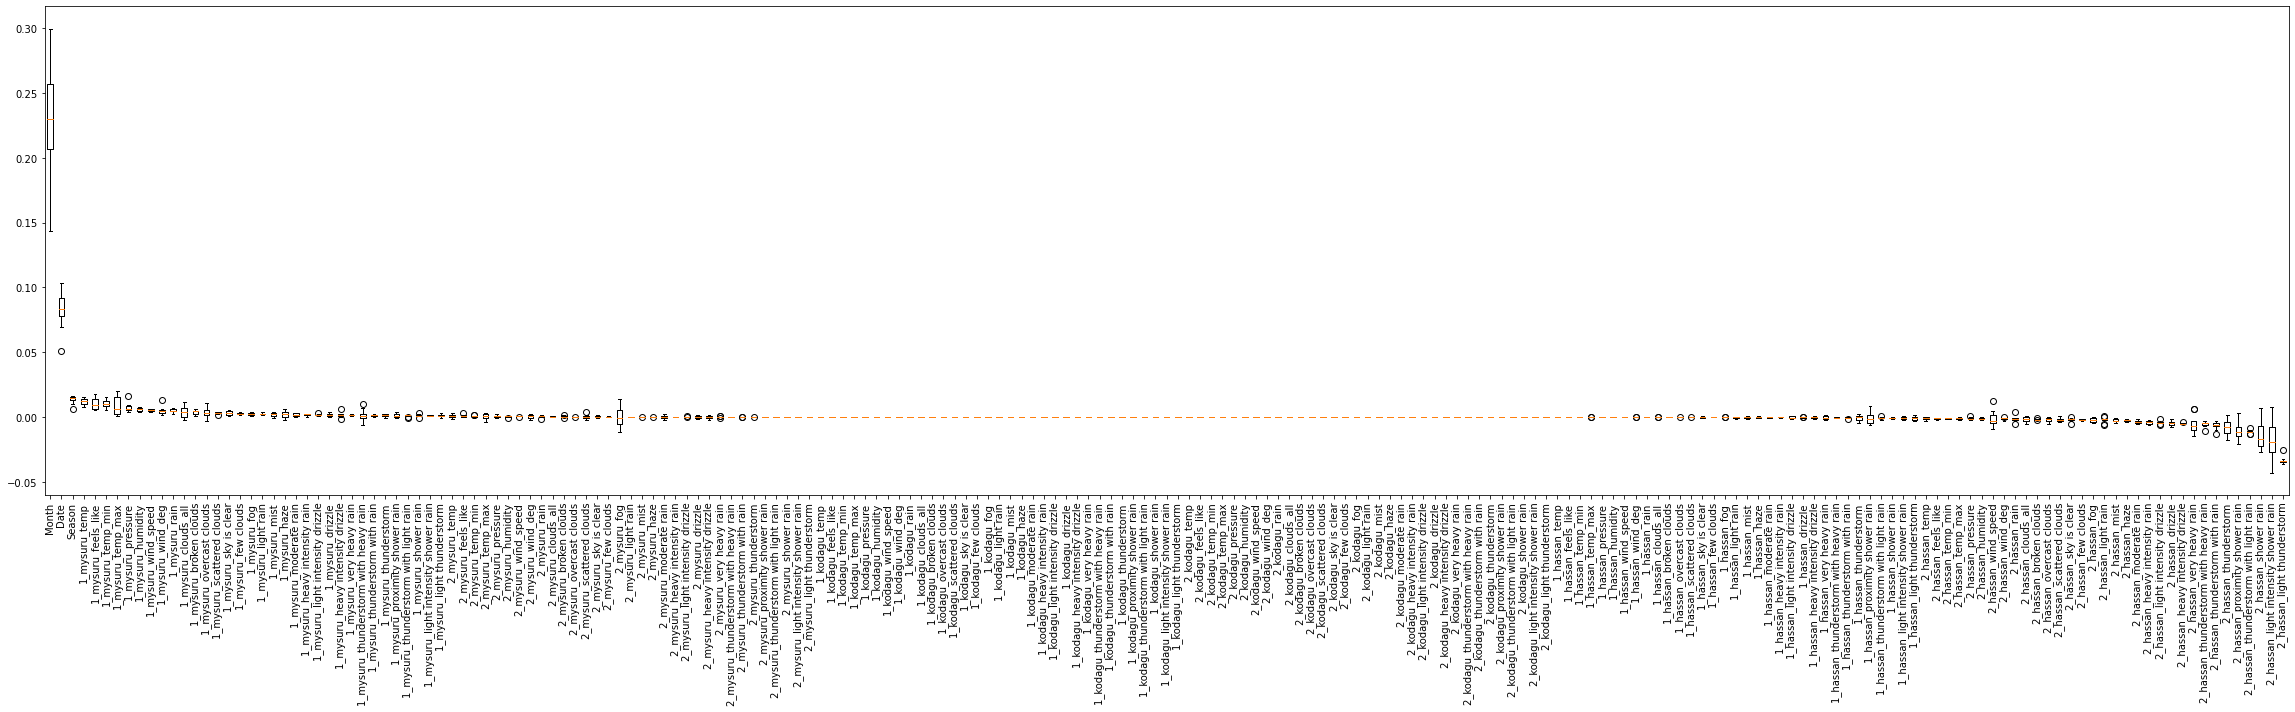

2_hassan_wind_speed: -0.033 +/- 0.003
1_mysuru_humidity: -0.018 +/- 0.015
2_mysuru_humidity: -0.014 +/- 0.011
2_kodagu_wind_speed: -0.011 +/- 0.001
1_hassan_humidity: -0.011 +/- 0.006
1_kodagu_humidity: -0.008 +/- 0.006
1_hassan_light rain: -0.006 +/- 0.003
1_mysuru_thunderstorm: -0.005 +/- 0.002
Date      : -0.005 +/- 0.007
2_kodagu_heavy intensity rain: -0.005 +/- 0.001
1_mysuru_wind_speed: -0.005 +/- 0.002
1_kodagu_clouds_all: -0.004 +/- 0.001
1_mysuru_temp: -0.004 +/- 0.001
1_kodagu_rain: -0.004 +/- 0.001
2_mysuru_wind_speed: -0.003 +/- 0.001
1_hassan_broken clouds: -0.003 +/- 0.001
1_mysuru_temp_min: -0.002 +/- 0.002
1_kodagu_wind_speed: -0.002 +/- 0.002
2_hassan_rain: -0.002 +/- 0.000
1_mysuru_feels_like: -0.002 +/- 0.001
1_kodagu_moderate rain: -0.002 +/- 0.002
1_kodagu_pressure: -0.002 +/- 0.002
2_mysuru_moderate rain: -0.002 +/- 0.001
1_kodagu_temp_max: -0.002 +/- 0.002
2_mysuru_few clouds: -0.002 +/- 0.002
2_kodagu_clouds_all: -0.001 +/- 0.001
1_hassan_overcast clouds: -0.001

In [46]:
r = permutation_importance(automl, X_val, y_val,
                           n_repeats=10,
                           random_state=0)

sort_idx = r.importances_mean.argsort()[::-1]
plt.figure(figsize=(32, 10))
plt.boxplot(r.importances[sort_idx].T, labels=feature_list)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(f"{feature_list[i]:10s}: {r.importances_mean[i]:.3f} +/- "
          f"{r.importances_std[i]:.3f}")

In [47]:
# pickle.dump(automl, open('inflow_autosklearn.pkl','wb'))

In [48]:
# with open('inflow_autosklearn.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

In [49]:
# loaded_model.predict(X_val)